In [1]:
%matplotlib inline


# Rasterization for vector graphics


Rasterization converts vector graphics into a raster image (pixels). It can
speed up rendering and produce smaller files for large data sets, but comes
at the cost of a fixed resolution.

Whether rasterization should be used can be specified per artist.  This can be
useful to reduce the file size of large artists, while maintaining the
advantages of vector graphics for other artists such as the axes
and text.  For instance a complicated `~.Axes.pcolormesh` or
`~.Axes.contourf` can be made significantly simpler by rasterizing.
Setting rasterization only affects vector backends such as PDF, SVG, or PS.

Rasterization is disabled by default. There are two ways to enable it, which
can also be combined:

- Set `~.Artist.set_rasterized` on individual artists, or use the keyword
  argument *rasterized* when creating the artist.
- Set `.Axes.set_rasterization_zorder` to rasterize all artists with a zorder
  less than the given value.

The storage size and the resolution of the rasterized artist is determined by
its physical size and the value of the ``dpi`` parameter passed to
`~.Figure.savefig`.

<div class="alert alert-info"><h4>Note</h4><p>The image of this example shown in the HTML documentation is not a vector
    graphic. Therefore, it cannot illustrate the rasterization effect. Please
    run this example locally and check the generated graphics files.</p></div>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


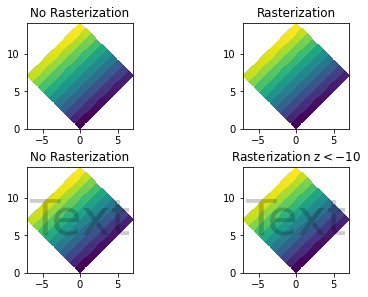

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d = np.arange(100).reshape(10, 10)  # the values to be color-mapped
x, y = np.meshgrid(np.arange(11), np.arange(11))

theta = 0.25*np.pi
xx = x*np.cos(theta) - y*np.sin(theta)  # rotate x by -theta
yy = x*np.sin(theta) + y*np.cos(theta)  # rotate y by -theta

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)

# pcolormesh without rasterization
ax1.set_aspect(1)
ax1.pcolormesh(xx, yy, d)
ax1.set_title("No Rasterization")

# pcolormesh with rasterization; enabled by keyword argument
ax2.set_aspect(1)
ax2.set_title("Rasterization")
m = ax2.pcolormesh(xx, yy, d, rasterized=True)

# pcolormesh with an overlaid text without rasterization
ax3.set_aspect(1)
ax3.pcolormesh(xx, yy, d)
ax3.text(0.5, 0.5, "Text", alpha=0.2,
         va="center", ha="center", size=50, transform=ax3.transAxes)
ax3.set_title("No Rasterization")

# pcolormesh with an overlaid text without rasterization; enabled by zorder.
# Setting the rasterization zorder threshold to 0 and a negative zorder on the
# pcolormesh rasterizes it. All artists have a non-negative zorder by default,
# so they (e.g. the text here) are not affected.
ax4.set_aspect(1)
m = ax4.pcolormesh(xx, yy, d, zorder=-10)
ax4.text(0.5, 0.5, "Text", alpha=0.2,
         va="center", ha="center", size=50, transform=ax4.transAxes)
ax4.set_rasterization_zorder(0)
ax4.set_title("Rasterization z$<-10$")

# Save files in pdf and eps format
plt.savefig("test_rasterization.pdf", dpi=150)
plt.savefig("test_rasterization.eps", dpi=150)

if not plt.rcParams["text.usetex"]:
    plt.savefig("test_rasterization.svg", dpi=150)
    # svg backend currently ignores the dpi

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.artist.Artist.set_rasterized`
   - `matplotlib.axes.Axes.set_rasterization_zorder`
   - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`

